<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/Dow_Jones/ARIMA/Dow_Jones_stock_prediction_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refs: 
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 

https://github.com/deshpandenu/Time-Series-Forecasting-of-Amazon-Stock-Prices-using-Neural-Networks-LSTM-and-GAN-/blob/master/Notebook%202_%20Stock%20Market%20Analysis%20using%20LSTM(Vanilla)-how%20good%20is%20a%20LSTM%20at%20predicting%20price%20movement.ipynb

https://www.datacamp.com/community/tutorials/lstm-python-stock-market


In [1]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 94kB/s 
     |████████████████████████████████| 491kB 32.3MB/s 
     |████████████████████████████████| 3.2MB 29.4MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [2]:

#import libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a f

In [0]:
df = pd.read_csv('DJI.csv')

In [12]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


### **MinMaxScaler**
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [0]:
df_close = df['Close']
df_close = df_close.values.reshape(len(df_close),1)

In [0]:
df_dates = df['Date']

In [0]:
df_dates = np.array(df_dates)

In [0]:
df_close = np.array(df_close)

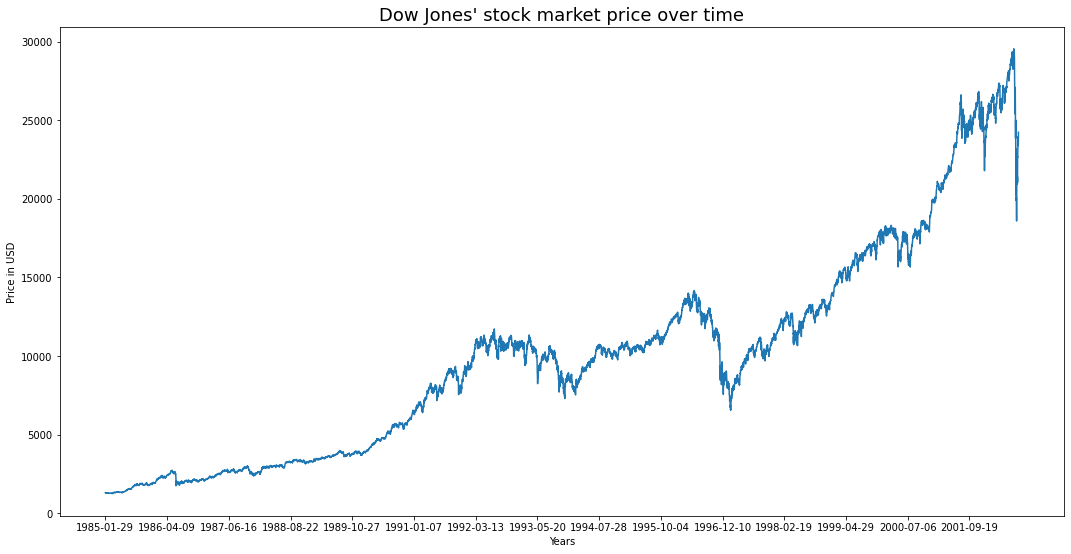

In [23]:
import matplotlib.dates as mdates

plt.figure(figsize = (18,9))
plt.plot(df_dates, df_close)

plt.xticks(np.arange(0,len(df),600), df['Date'][0:len(df):300])

plt.ylabel('Price in USD')
plt.xlabel('Years')
plt.title("Dow Jones' stock market price over time", fontsize = 18)

plt.show()


In [0]:
X = df_dates

In [0]:
Y = df_close

In [0]:

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

### Normalizing Dow Jones' stock's price 

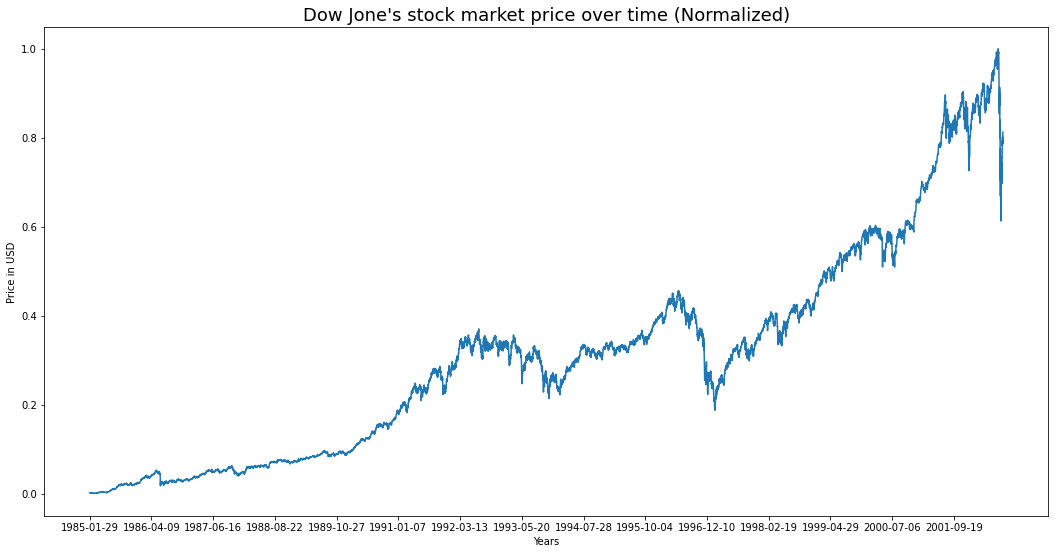

In [27]:
import matplotlib.dates as mdates

plt.figure(figsize = (18,9))
plt.plot(df_dates, df_close)

plt.xticks(np.arange(0,len(df),600), df['Date'][0:len(df):300])

plt.ylabel('Price in USD')
plt.xlabel('Years')
plt.title("Dow Jone's stock market price over time (Normalized)", fontsize = 18)

plt.show()

In [28]:
df['Close']

0        1292.619995
1        1287.880005
2        1286.770020
3        1277.719971
4        1290.079956
            ...     
8872    23390.769531
8873    23949.759766
8874    23504.349609
8875    23537.679688
8876    24242.490234
Name: Close, Length: 8877, dtype: float64

In [0]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
series = df['Close']

In [0]:
series.index = df['Date']

In [33]:
series

Date
1985-01-29     1292.619995
1985-01-30     1287.880005
1985-01-31     1286.770020
1985-02-01     1277.719971
1985-02-04     1290.079956
                  ...     
2020-04-13    23390.769531
2020-04-14    23949.759766
2020-04-15    23504.349609
2020-04-16    23537.679688
2020-04-17    24242.490234
Name: Close, Length: 8877, dtype: float64

In [0]:
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]

In [35]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 8505
Model:                     ARMA(7, 1)   Log Likelihood              -55919.602
Method:                       css-mle   S.D. of innovations            173.414
Date:                Sun, 19 Apr 2020   AIC                         111859.204
Time:                        18:42:53   BIC                         111929.688
Sample:                             0   HQIC                        111883.256
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1057.3483    478.610      2.209      0.027     119.290    1995.407
ar.L1.y        0.2632      0.038      7.015      0.000       0.190       0.337
ar.L2.y        0.6975      0.034     20.443      0.0

In [0]:
forecast = model_fit.forecast()[0]

In [0]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)

In [38]:
print('Forecast: %f' % forecast)

Forecast: 22259.844335


In [0]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [0]:
from pandas import datetime

forecast = model_fit.predict(start=start_index, end=end_index)

In [41]:

# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 22259.844335


In [0]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]

In [67]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 22259.844335
Day 2: 22669.181841
Day 3: 22328.375660
Day 4: 22166.292495
Day 5: 22420.093612
Day 6: 22798.586281
Day 7: 22977.071554


In [0]:
history_np = np.array(history)

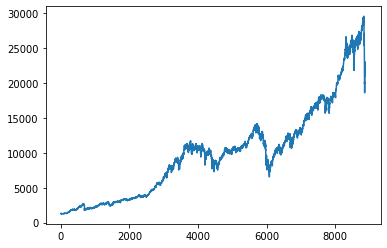

In [69]:
plt.plot(history_np)

In [70]:
len(df)

8877

In [71]:
len(history_np)

8877

In [72]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 8870, Validation 7


In [73]:
len(list(dataset))

8870

In [74]:
len(list(history))

8877

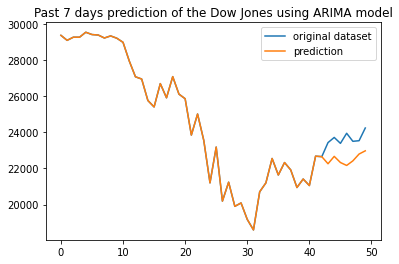

In [75]:
plt.plot(list(series)[-50:], label = 'original dataset')
plt.plot(history[-50:], label = 'prediction')
plt.title("Past 7 days prediction of the Dow Jones using ARIMA model")
plt.legend()